# Oscillation

<!-- This notebook will show how to do a transient simulation with given scheduling results. -->

In [1]:
import andes

In [2]:
andes.__version__

'1.9.3'

In [3]:
%matplotlib inline

In [4]:
andes.config_logger(stream_level=20)

## Transient Simulation with ANDES

In [5]:
ss = andes.load(andes.get_case('kundur/kundur_full.xlsx'),
                setup=True,
                no_output=True,
                default_config=True)

Working directory: "/Users/jinningwang/work/demo/demo/oscillation"
> Loaded generated Python code in "/Users/jinningwang/.andes/pycode".
Generated code for <PQ> is stale.
Numerical code generation (rapid incremental mode) started...


Generating code for 1 models on 12 processes.


Saved generated pycode to "/Users/jinningwang/.andes/pycode"
> Reloaded generated Python code of module "pycode".
Generated numerical code for 1 models in 0.1048 seconds.
Parsing input file "/Users/jinningwang/work/miniconda3/envs/amsre/lib/python3.12/site-packages/andes/cases/kundur/kundur_full.xlsx"...
Input file parsed in 0.2373 seconds.
System internal structure set up in 0.0156 seconds.


In [6]:
ss.Toggle.as_df()

,idx,u,name,model,dev,t
uid,,,,,,
0,1,1.0,Toggler_1,Line,Line_8,2.0


In [7]:
ss.TDS.config.tf = 50

ss.PFlow.run()

-> System connectivity check results:
  No islanded bus detected.
  System is interconnected.
  Each island has a slack bus correctly defined and enabled.

-> Power flow calculation
           Numba: Off
   Sparse solver: KLU
 Solution method: NR method
Power flow initialized in 0.0023 seconds.
0: |F(x)| = 14.9282832
1: |F(x)| = 3.608627841
2: |F(x)| = 0.1701107882
3: |F(x)| = 0.002038626956
4: |F(x)| = 3.745103979e-07
Converged in 5 iterations in 0.0033 seconds.


True

In [8]:
_ = ss.TDS.init()

Initialization for dynamics completed in 0.0260 seconds.
Initialization was successful.


In [9]:
ss.TDS.run()


-> Time Domain Simulation Summary:
Sparse Solver: KLU
Simulation time: 0.0-50 s.
Fixed step size: h=33.33 ms. Shrink if not converged.


  0%|          | 0/100 [00:00<?, ?%/s]

<Toggle 1>: Line.Line_8 status changed to 0 at t=2.0 sec.


Simulation to t=50.00 sec completed in 1.0448 seconds.


True

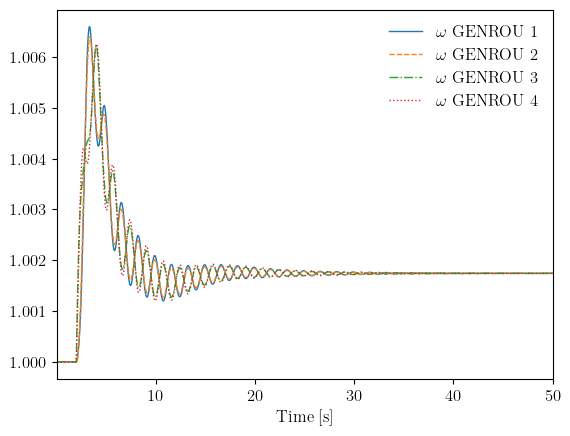

(<Figure size 640x480 with 1 Axes>, <Axes: xlabel='Time [s]'>)

In [10]:
ss.TDS.plt.plot(ss.GENROU.omega)

In [13]:
ss.models

OrderedDict([('Summary', Summary (0 devices) at 0x127a878f0),
             ('Output', Output (0 devices) at 0x127a879e0),
             ('Toggle', Toggle (1 device) at 0x127c8f740),
             ('Fault', Fault (0 devices) at 0x1341cff80),
             ('Alter', Alter (0 devices) at 0x127f363f0),
             ('TimeSeries', TimeSeries (0 devices) at 0x127867c50),
             ('Bus', Bus (10 devices) at 0x1343580e0),
             ('PQ', PQ (2 devices) at 0x1271cd280),
             ('PV', PV (3 devices) at 0x134459a30),
             ('Slack', Slack (1 device) at 0x127a4b860),
             ('Shunt', Shunt (0 devices) at 0x13406c7a0),
             ('ShuntTD', ShuntTD (0 devices) at 0x127a48890),
             ('ShuntSw', ShuntSw (0 devices) at 0x13445b8f0),
             ('Fortescue', Fortescue (0 devices) at 0x127894980),
             ('Line', Line (15 devices) at 0x127fbad50),
             ('Jumper', Jumper (0 devices) at 0x1344b2a20),
             ('Area', Area (2 devices) at 0x1344b2e70)